<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#初始化" data-toc-modified-id="初始化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>初始化</a></span></li><li><span><a href="#读取数据" data-toc-modified-id="读取数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>读取数据</a></span></li><li><span><a href="#查看同一地点同一设备的强度情况" data-toc-modified-id="查看同一地点同一设备的强度情况-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>查看同一地点同一设备的强度情况</a></span></li><li><span><a href="#多维向量对比结果" data-toc-modified-id="多维向量对比结果-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>多维向量对比结果</a></span><ul class="toc-item"><li><span><a href="#建立pci的全表" data-toc-modified-id="建立pci的全表-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>建立pci的全表</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>结论</a></span></li></ul></li></ul></div>

## 初始化

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
    import os
    import shutil

## 读取数据

In [255]:
filedir1='/media/aaron/新加卷1/工作记录/项目产出及记录/基站定位方案/mate'
result=pd.DataFrame()
count=-1
timefileindex=0
togglefiletime=True
for parent, dirnames, filenames in os.walk(filedir1):# os.walk返回迭代对象，文件路径，路径名字，文件名字
    for filename in filenames:
        if filename.endswith('txt'):
            fullfilename=os.path.join(parent,filename) 
            if togglefiletime:
                timefile=filename[:-11]
                togglefiletime=False
            with open(fullfilename,'r') as f:
            #     print (f.readlines()) 
                for line in f.readlines():
                    if line=='\n':
                        count=count+1
                        result.loc[count,'PosIndex']=parent[-1]
                        if filename[:-11]!=timefile:
                            timefileindex=timefileindex+1
                            timefile=filename[:-11]
                        result.loc[count,'time']=int(timefileindex)%5
                        #result.loc[count,'ddtime']=int(timefileindex)%5
                    else:
                        txttmp=line[:-1].split('=')
                        result.loc[count,txttmp[0]]=float(txttmp[-1])                        

In [248]:
data1=result.copy()#vivo

In [256]:
data2=result.copy()#mate
data2.head()

,PosIndex,time,mcc,mnc,ci,pci,tac,dbm,asuLevel,timingAdvance,level
0,1,0.0,460.0,1.0,7.826819e+06,395.0,4.345000e+03,-91.0,49.0,2.147484e+09,4.0
1,1,0.0,460.0,1.0,2.147484e+09,317.0,2.147484e+09,-100.0,40.0,2.147484e+09,3.0
2,1,0.0,460.0,1.0,2.147484e+09,86.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
3,1,0.0,460.0,1.0,2.147484e+09,316.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
4,1,0.0,460.0,1.0,2.147484e+09,287.0,2.147484e+09,-103.0,37.0,2.147484e+09,3.0


In [257]:
data2

,PosIndex,time,mcc,mnc,ci,pci,tac,dbm,asuLevel,timingAdvance,level
0,1,0.0,460.0,1.0,7.826819e+06,395.0,4.345000e+03,-91.0,49.0,2.147484e+09,4.0
1,1,0.0,460.0,1.0,2.147484e+09,317.0,2.147484e+09,-100.0,40.0,2.147484e+09,3.0
2,1,0.0,460.0,1.0,2.147484e+09,86.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
3,1,0.0,460.0,1.0,2.147484e+09,316.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
4,1,0.0,460.0,1.0,2.147484e+09,287.0,2.147484e+09,-103.0,37.0,2.147484e+09,3.0
5,1,0.0,460.0,1.0,2.147484e+09,285.0,2.147484e+09,-103.0,37.0,2.147484e+09,3.0
6,1,0.0,460.0,0.0,1.834548e+07,473.0,4.141000e+03,-86.0,54.0,2.147484e+09,4.0
7,1,0.0,460.0,0.0,2.147484e+09,421.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
8,1,0.0,460.0,0.0,2.147484e+09,420.0,2.147484e+09,-101.0,39.0,2.147484e+09,3.0
9,1,1.0,460.0,1.0,7.826819e+06,395.0,4.345000e+03,-83.0,57.0,2.147484e+09,4.0


In [176]:
data1.columns

Index(['PosIndex', 'time', 'mcc ', 'mnc ', 'ci ', 'pci ', 'tac', 'dbm',
       'asuLevel', 'timingAdvance', 'level'],
      dtype='object')

In [130]:
test=data1[(data1['PosIndex']=='1')].groupby(by='pci ')

In [138]:
PciList=data1.drop_duplicates(subset='pci ').loc[:,'pci '].values.tolist()

## 查看同一地点同一设备的强度情况

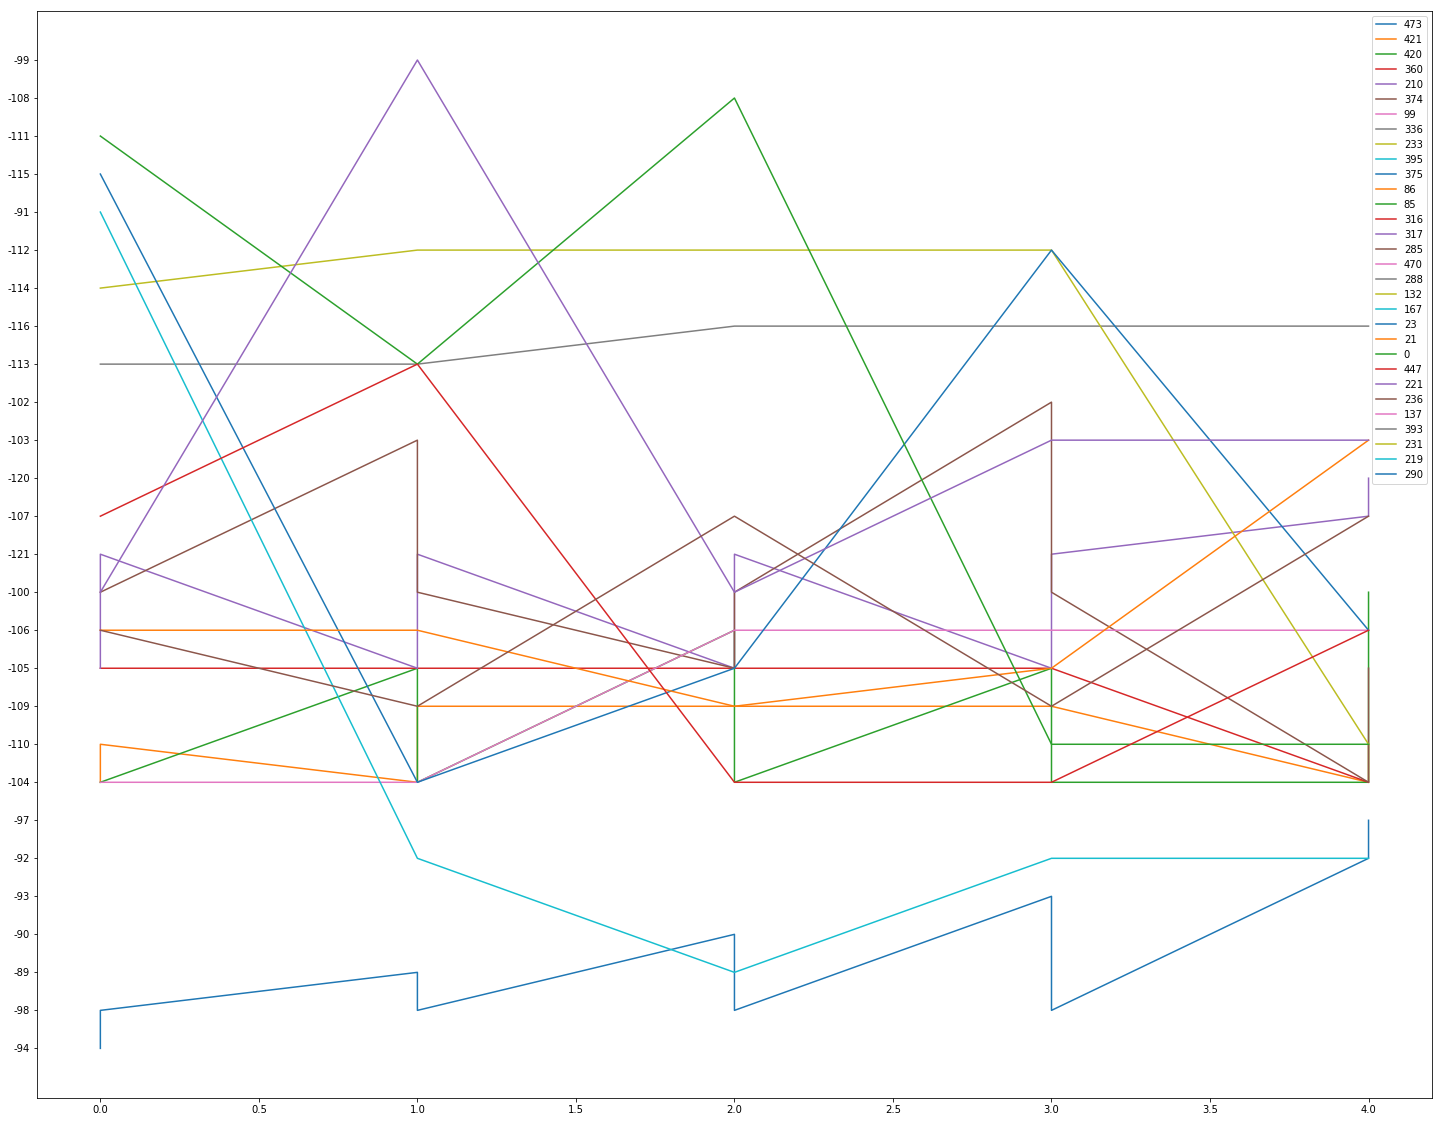

In [154]:
plt.figure(figsize=(25,20))
for i in PciList:
    plt.plot(data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'time'].values.tolist(),data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'dbm'].values.tolist(),label=i)
plt.legend()

In [178]:
data1.loc[(data1['PosIndex']=='1'),['pci ','dbm']].groupby(by='pci ').std()

,dbm
pci,
85.0,1.816590
86.0,2.167948
99.0,1.095445
210.0,8.143846
233.0,1.414214
285.0,1.341641
316.0,3.701351
317.0,1.870829
336.0,1.643168


In [180]:
i=360.0
#data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'time'].values.tolist()
data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'dbm'].values.tolist()

[-105.0, -105.0, -105.0, -105.0, -104.0]

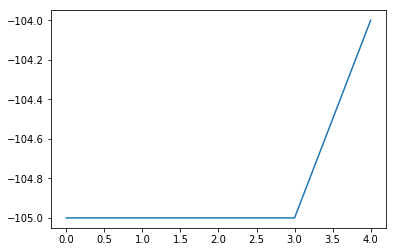

In [181]:
i=360.0
#data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'time'].values.tolist()
plt.plot(data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'time'].values.tolist(),data1[(data1['PosIndex']=='1')&(data1['pci ']==i)].loc[:,'dbm'].values.tolist(),label=i)

## 多维向量对比结果

### 建立pci的全表

In [183]:
PciList

[473,
 421,
 420,
 360,
 210,
 374,
 99,
 336,
 233,
 395,
 375,
 86,
 85,
 316,
 317,
 285,
 470,
 288,
 132,
 167,
 23,
 21,
 0,
 447,
 221,
 236,
 137,
 393,
 231,
 219,
 290]

In [189]:
PciList.index(PciList[1])

1

In [258]:
PosIndexList=data1.drop_duplicates(subset='PosIndex').loc[:,'PosIndex'].values.tolist()
TimeIndexList=data1.drop_duplicates(subset='time').loc[:,'time'].values.tolist()

In [261]:
data1result=np.zeros((len(PosIndexList),len(TimeIndexList),len(PciList)))
for item in data1.iterrows():
    data1result[PosIndexList.index(item[1]['PosIndex']),TimeIndexList.index(item[1]['time']),PciList.index(item[1]['pci '])]=item[1]['dbm']

In [259]:
TimeIndexList

[0.0, 1.0, 2.0, 3.0, 4.0]

In [262]:
data2result=np.zeros((len(PosIndexList),len(TimeIndexList),len(PciList)))
for item in data2.iterrows():
    try:
        data2result[PosIndexList.index(item[1]['PosIndex']),TimeIndexList.index(item[1]['time']),PciList.index(item[1]['pci '])]=item[1]['dbm']
    except Exception as e:
        print (e)

287.0 is not in list
287.0 is not in list
287.0 is not in list
352.0 is not in list
351.0 is not in list
468.0 is not in list
378.0 is not in list
468.0 is not in list
352.0 is not in list
378.0 is not in list
471.0 is not in list
352.0 is not in list
241.0 is not in list
352.0 is not in list
268.0 is not in list
241.0 is not in list
352.0 is not in list
268.0 is not in list
241.0 is not in list
352.0 is not in list
268.0 is not in list
241.0 is not in list
84.0 is not in list
315.0 is not in list
315.0 is not in list
352.0 is not in list
268.0 is not in list
315.0 is not in list
352.0 is not in list
268.0 is not in list
352.0 is not in list
268.0 is not in list
352.0 is not in list
268.0 is not in list
352.0 is not in list
351.0 is not in list
468.0 is not in list
352.0 is not in list
351.0 is not in list
287.0 is not in list
352.0 is not in list
351.0 is not in list
287.0 is not in list
352.0 is not in list
351.0 is not in list
352.0 is not in list
498.0 is not in list
268.0 is not i

25


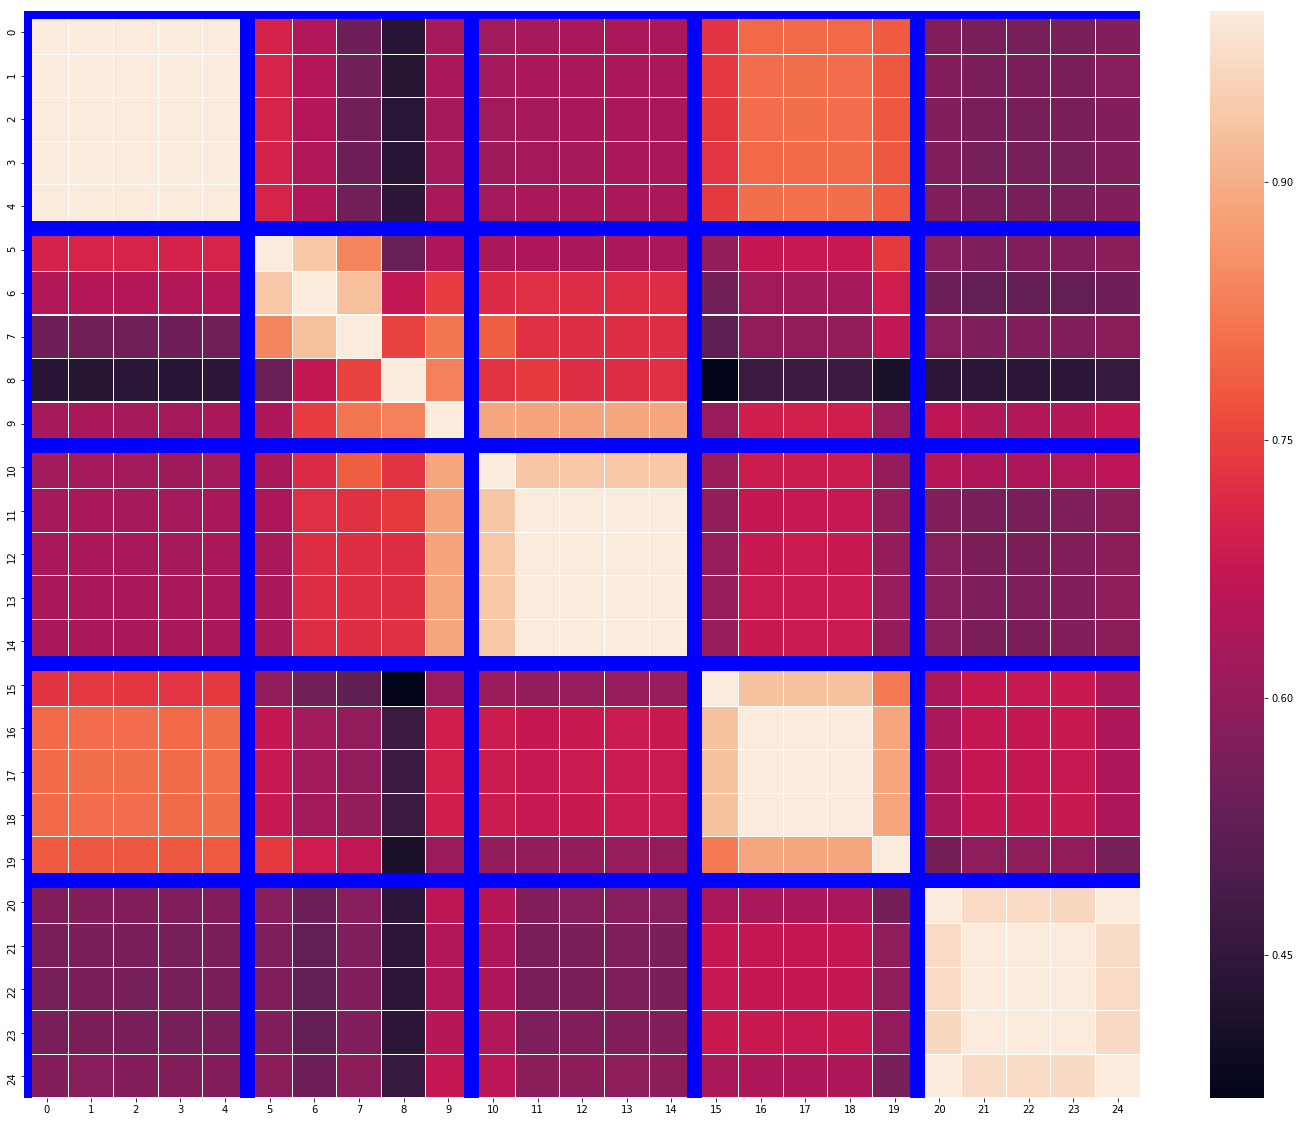

In [294]:
tmpresult=[]
for ind1,poiIndex in enumerate(PosIndexList):
    for ind2,timeIndex in enumerate(TimeIndexList):
        tmpresult.append(data1result[ind1,ind2,:])
print (len(tmpresult))        
dataCorSelf=np.zeros((len(tmpresult),len(tmpresult)))
for ind1,item in enumerate(tmpresult):
    for ind2,jitem in enumerate(tmpresult):    
        dataCorSelf[ind1,ind2]=(tmpresult[ind1]*tmpresult[ind2]).sum()/np.linalg.norm(tmpresult[ind1])/np.linalg.norm(tmpresult[ind2]) 
plt.figure(figsize=(25,20))
sns.heatmap(dataCorSelf,linewidths = 0.05)
for item in range(5):
    plt.plot([item*5,item*5],[25,0],'-',c='blue',lw=15)
    plt.plot([25,0],[item*5,item*5],'-',c='blue',lw=15)

25


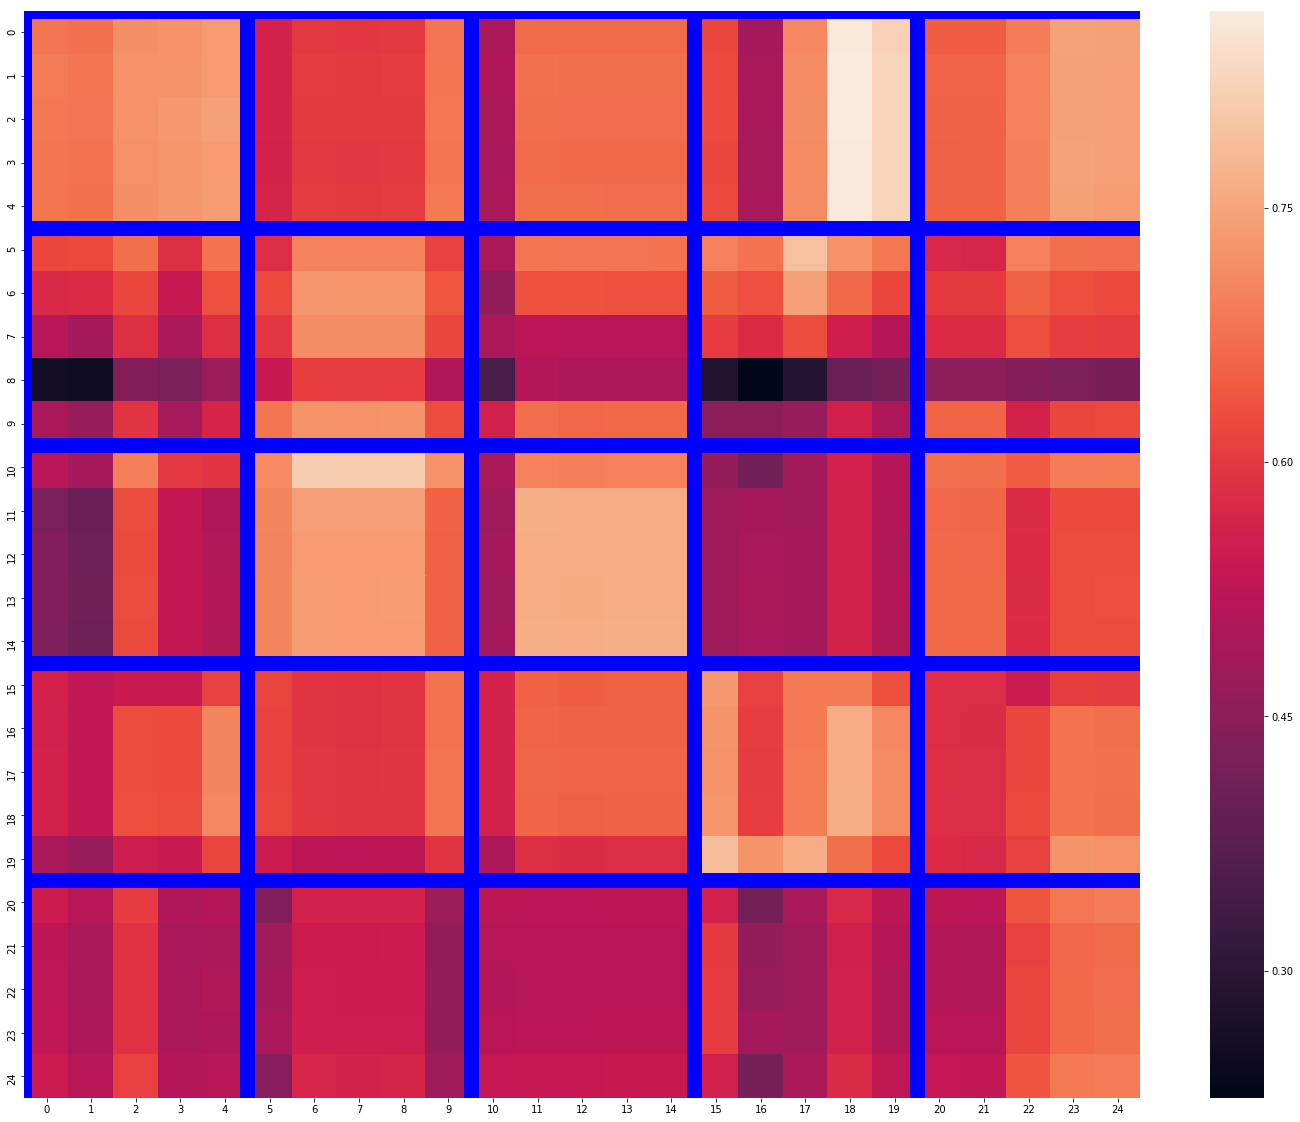

In [295]:
tmp2result=[]
for ind1,poiIndex in enumerate(PosIndexList):
    for ind2,timeIndex in enumerate(TimeIndexList):
        tmp2result.append(data2result[ind1,ind2,:])
print (len(tmp2result))        
dataCorSelf=np.zeros((len(tmpresult),len(tmpresult)))
for ind1,item in enumerate(tmpresult):
    for ind2,jitem in enumerate(tmp2result):    
        dataCorSelf[ind1,ind2]=(tmpresult[ind1]*tmp2result[ind2]).sum()/np.linalg.norm(tmpresult[ind1])/np.linalg.norm(tmp2result[ind2]) 
plt.figure(figsize=(25,20))
sns.heatmap(dataCorSelf)
for item in range(5):
    plt.plot([item*5,item*5],[25,0],'-',c='blue',lw=15)
    plt.plot([25,0],[item*5,item*5],'-',c='blue',lw=15)

### 结论

1. 手机设备自身与自身配合，信号是较为稳定的，相似度较高
2. 手机相互设备之间，虽有干扰，但是仍然具有一定的匹配度
3. 这里最近的距离是接近8m，最远的接近30m，区分度比较稳定的
4. 使用了双卡双待的手机，可以完成其中很大一部分的信息
5. 明天测试是否单卡手机仍然有效